In [ ]:
# This code is based on the following website
# PCA using Python (scikit-learn). My last tutorial went over Logistic… | by Michael Galarnyk | Towards Data Science https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
            

In [12]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
print(df)

     sepal length  sepal width  petal length  petal width          target
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


array([[<AxesSubplot:xlabel='sepal length', ylabel='sepal length'>,
        <AxesSubplot:xlabel='sepal width', ylabel='sepal length'>,
        <AxesSubplot:xlabel='petal length', ylabel='sepal length'>,
        <AxesSubplot:xlabel='petal width', ylabel='sepal length'>],
       [<AxesSubplot:xlabel='sepal length', ylabel='sepal width'>,
        <AxesSubplot:xlabel='sepal width', ylabel='sepal width'>,
        <AxesSubplot:xlabel='petal length', ylabel='sepal width'>,
        <AxesSubplot:xlabel='petal width', ylabel='sepal width'>],
       [<AxesSubplot:xlabel='sepal length', ylabel='petal length'>,
        <AxesSubplot:xlabel='sepal width', ylabel='petal length'>,
        <AxesSubplot:xlabel='petal length', ylabel='petal length'>,
        <AxesSubplot:xlabel='petal width', ylabel='petal length'>],
       [<AxesSubplot:xlabel='sepal length', ylabel='petal width'>,
        <AxesSubplot:xlabel='sepal width', ylabel='petal width'>,
        <AxesSubplot:xlabel='petal length', ylabel='petal 

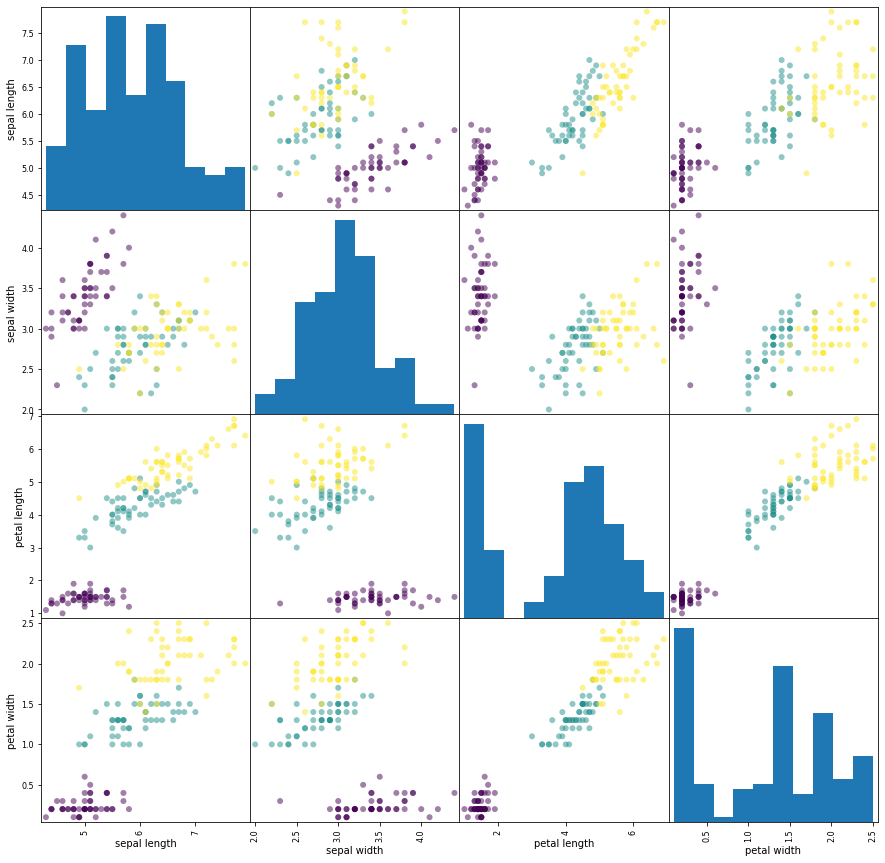

In [71]:
# Multivariable scatter plot
pd.plotting.scatter_matrix(df,figsize=(15, 15), c=iris["target"], marker="o")

In [65]:
# Correlation matrix
df.corr().style.background_gradient(axis=None, cmap="jet")

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


In [26]:
#1. Standarize the data
from sklearn.preprocessing import StandardScaler

features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:,features].to_numpy()
y = df.loc[:,['target']].to_numpy()

x = StandardScaler().fit_transform(x)
renewed_data = np.append(x,y,axis=1)

standarized_df = pd.DataFrame(data=renewed_data, columns=['sepal length','sepal width','petal length','petal width','target'])
print(standarized_df)

    sepal length sepal width petal length petal width          target
0      -0.900681     1.03206     -1.34127    -1.31298     Iris-setosa
1       -1.14302   -0.124958     -1.34127    -1.31298     Iris-setosa
2       -1.38535    0.337848     -1.39814    -1.31298     Iris-setosa
3       -1.50652    0.106445     -1.28441    -1.31298     Iris-setosa
4       -1.02185     1.26346     -1.34127    -1.31298     Iris-setosa
..           ...         ...          ...         ...             ...
145        1.038   -0.124958     0.819624     1.44796  Iris-virginica
146     0.553333    -1.28197     0.705893    0.922064  Iris-virginica
147     0.795669   -0.124958     0.819624     1.05354  Iris-virginica
148     0.432165    0.800654     0.933356     1.44796  Iris-virginica
149    0.0686618   -0.124958     0.762759    0.790591  Iris-virginica

[150 rows x 5 columns]


Series([], dtype: float64)

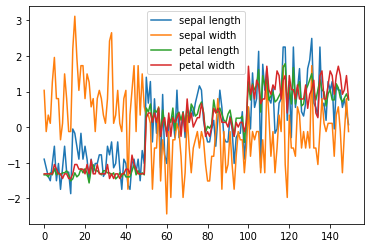

In [32]:
standarized_df.plot()

In [44]:
# standarized_df.iloc[:,0:4].mean()
standarized_df.loc[:,features].mean()

sepal length   -2.775558e-16
sepal width    -5.140333e-16
petal length    1.154632e-16
petal width     9.251859e-16
dtype: float64

In [45]:
standarized_df.loc[:,features].var()

sepal length    1.006711
sepal width     1.006711
petal length    1.006711
petal width     1.006711
dtype: float64

In [ ]:
#2. PCA

In [57]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
print(principalDf)


     principal component 1  principal component 2
0                -2.264542               0.505704
1                -2.086426              -0.655405
2                -2.367950              -0.318477
3                -2.304197              -0.575368
4                -2.388777               0.674767
..                     ...                    ...
145               1.870522               0.382822
146               1.558492              -0.905314
147               1.520845               0.266795
148               1.376391               1.016362
149               0.959299              -0.022284

[150 rows x 2 columns]
[20.89551896 11.75513248]


In [59]:
# Singular values
pca.singular_values_

array([20.89551896, 11.75513248])

In [68]:
pca.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577]])

In [58]:
# Explained variance ratio
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [66]:
# Cumulative contribution ratio
np.cumsum(pca.explained_variance_ratio_)

array([0.72770452, 0.95800975])

Text(0, 0.5, 'FC2')

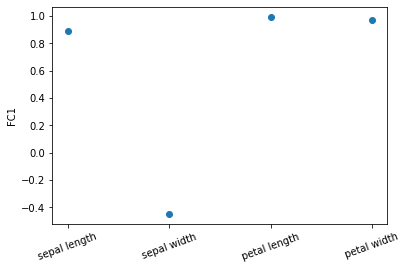

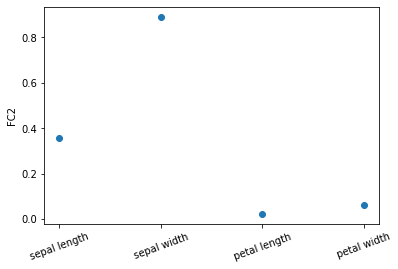

In [72]:
# Factor loadings
factor_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

#FC1
fig,axes = plt.subplots()
axes.scatter(list(range(factor_loadings.shape[0])),factor_loadings[:,0])
plt.xticks(list(range(factor_loadings.shape[0])),features)
axes.set_ylabel("FC1")
plt.xticks(rotation = 20)

#FC2
fig,axes = plt.subplots()
axes.scatter(list(range(factor_loadings.shape[0])),factor_loadings[:,1])
plt.xticks(list(range(factor_loadings.shape[0])),features)
axes.set_ylabel("FC2")
plt.xticks(rotation = 20)


In [55]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
print(finalDf)

     principal component 1  principal component 2          target
0                -2.264542               0.505704     Iris-setosa
1                -2.086426              -0.655405     Iris-setosa
2                -2.367950              -0.318477     Iris-setosa
3                -2.304197              -0.575368     Iris-setosa
4                -2.388777               0.674767     Iris-setosa
..                     ...                    ...             ...
145               1.870522               0.382822  Iris-virginica
146               1.558492              -0.905314  Iris-virginica
147               1.520845               0.266795  Iris-virginica
148               1.376391               1.016362  Iris-virginica
149               0.959299              -0.022284  Iris-virginica

[150 rows x 3 columns]


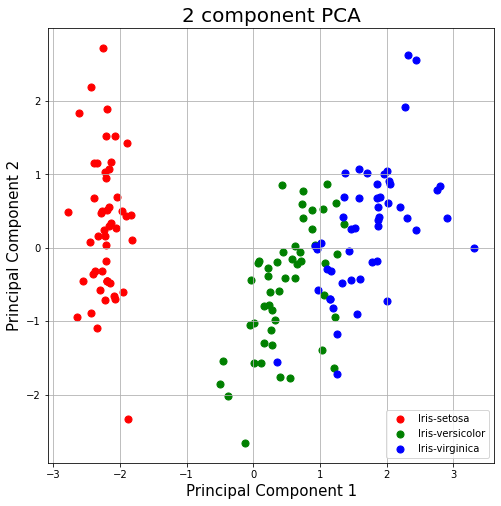

In [56]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()